In [24]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*(x**2) - 4*x + 5

In [ ]:
f(3)

20

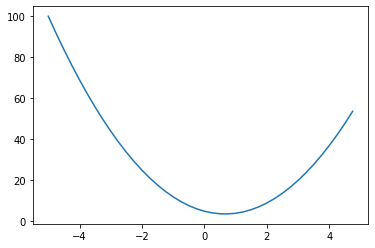

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.01
x = 2/3
(f(x + h) - f(x))/h

0.02999999999997449

In [ ]:
a = 2
b = -3
c = 10
d = a*b + c
print(d)

4


In [ ]:
h = 0.001

a = 2
b = -3
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

print(d1)
print(d2)
print((d2-d1)/h)

4
3.997
-3.0000000000001137


In [5]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float))
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other):
    return self * other

  def __truediv__(self, other): 
    return self * other**-1

  def __neg__(self): 
    return self * -1

  def __sub__(self, other): 
    return self + (-other)

  def __radd__(self, other): 
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
a = Value(2., label='a')
b = Value(-3., label='b')
c = Value(10., label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2., label='f')
L = d * f; L.label='L'

In [ ]:
print(d._prev, d._op)

{Value(data=10), Value(data=-6.0)} +


In [42]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f  }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

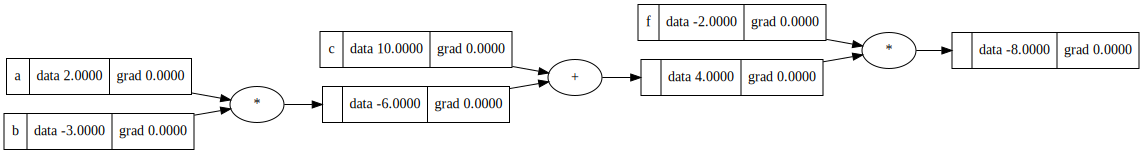

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b 
d = e + c 
L = d * f

print(L.data)

-8.0


In [ ]:
L.grad = 1
d.grad = -2
f.grad = 4
c.grad = -2
e.grad = -2
a.grad = 6
b.grad = -4

In [ ]:
def lol():
  h = 0.001
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2, label='f')
  L = d * f; L.label='L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2, label='f')
  L = d * f; L.label='L'
  L2 = L.data

  print((L2-L1)/h)

lol()

0.0


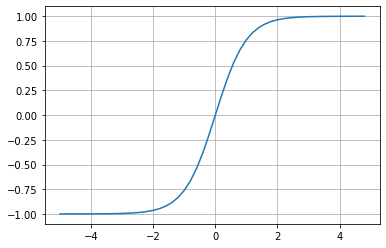

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [ ]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights 
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'


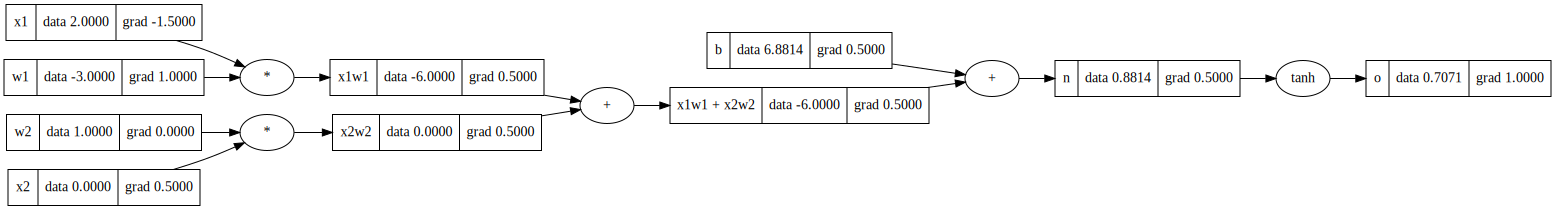

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

In [ ]:
o.backward()

In [ ]:
o.grad = 1.0

o = tanh(n)

d/dx tanh(x) = 1 - tanh(x)^2

do/dn = 1 - tanh(n)^2 => 1 - o^2

In [ ]:
1 - o.data**2

0.4999999999999999

In [ ]:
o.data
n.grad = .5
x1w1x2w2.grad = .5
b.grad = .5
x1w1.grad = 0.5
x2w2.grad = 0.5

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

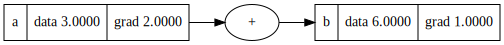

In [ ]:
a = Value(3, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

In [ ]:
a = Value(2)
a.exp()

Value(data=7.38905609893065)

In [ ]:
a = Value(2)
b = Value(4)

b/a

Value(data=2.0)

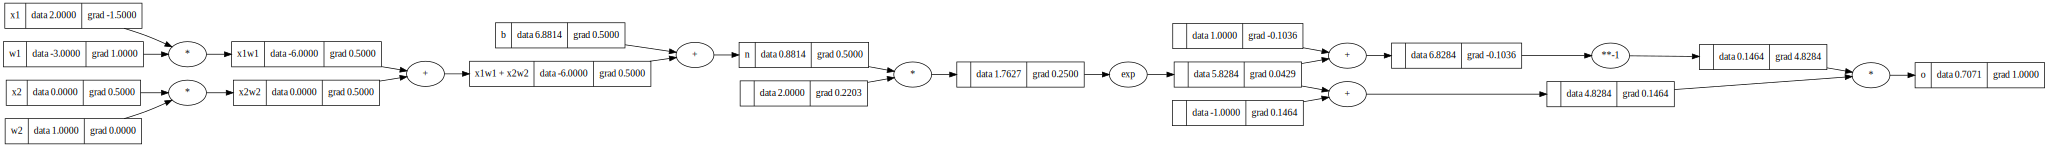

In [ ]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights 
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'

e = (2*n).exp()
o = (e - 1) / (e + 1); o.label='o'

o.backward()
draw_dot(o)

In [2]:
import torch

In [4]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [111]:
class Neuron:
  def __init__(self, nin):
    # nin : number of inputs
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1, 1))

  def __call__(self, x):
    # w * x + b
    # act : activation
    act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b
    return act.tanh()
  def parameters(self):
    return self.w + [self.b]


class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


x = [2., 3., -1]
n = MLP(3, [4, 4, 1])
n(x)

o = n(x)
o.backward()

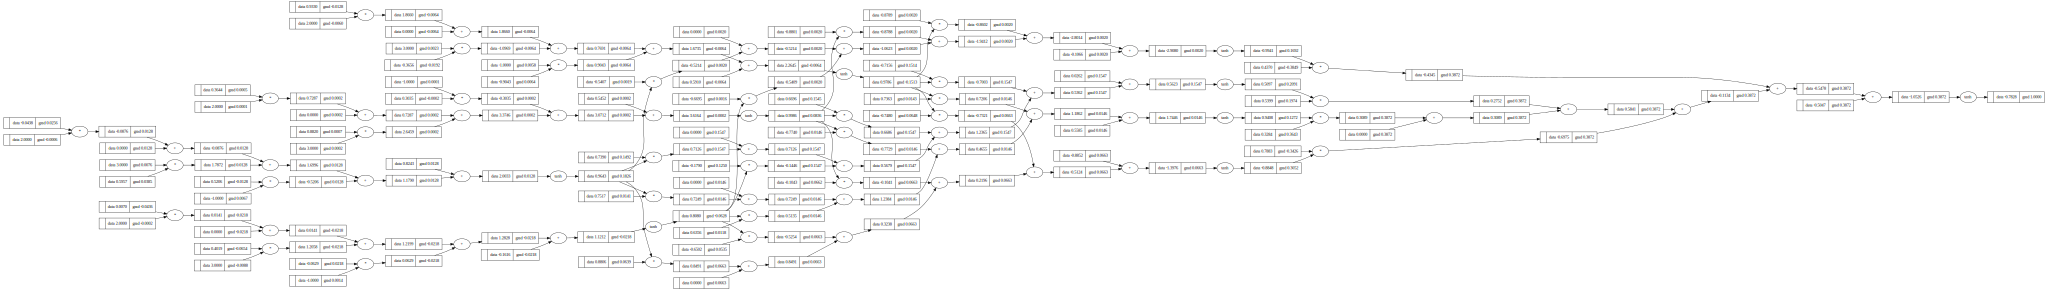

In [49]:
draw_dot(o)

In [72]:
xs = [
    [2., 3., -1.],
    [3., -1., .5],
    [.5, 1., 1.],
    [1., 1., -1.],
]

ys = [1., -1., -1., 1.]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.10732391414508065),
 Value(data=-0.27665324065315133),
 Value(data=-0.4638661549153841),
 Value(data=-0.07158591101441582)]

In [73]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=2.7558369930446576)

In [97]:
loss.backward()

In [75]:
n.layers[0].neurons[0].w[0].grad

-0.42541470390547514

In [76]:
n.layers[0].neurons[0].w[0].data

-0.9846810785623006

In [94]:
for p in n.parameters():
  p.data += -0.01 * p.grad 

In [96]:
n.layers[0].neurons[0].w[0].data

-0.9378854611326978

In [103]:
[n(x) for x in xs]

[Value(data=0.8922571773794888),
 Value(data=-0.7409865819294807),
 Value(data=-0.5697950519223243),
 Value(data=0.896103563434096)]

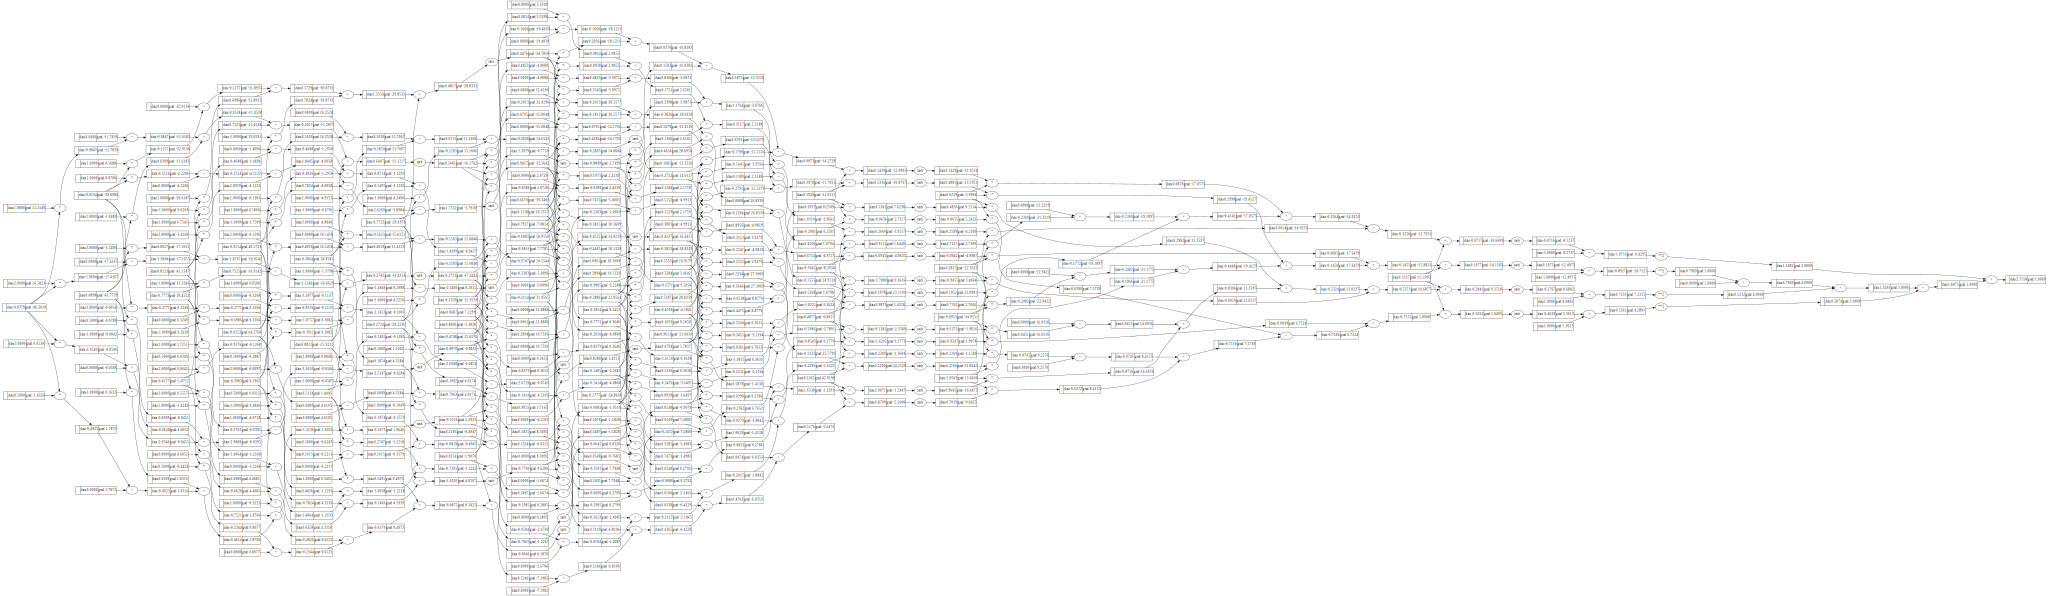

In [98]:
draw_dot(loss)

In [117]:
xs = [
    [2., 3., -1.],
    [3., -1., .5],
    [.5, 1., 1.],
    [1., 1., -1.],
]

ys = [1., -1., -1., 1.]

for k in range(20):
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  for p in n.parameters():
    p.grad = 0
  loss.backward()

  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(k, loss.data)


0 2.2987197542053536e-15
1 2.2987197542053536e-15
2 2.2987197542053536e-15
3 2.2987197542053536e-15
4 2.2987197542053536e-15
5 2.2987197542053536e-15
6 2.2987197542053536e-15
7 2.2987197542053536e-15
8 2.2987197542053536e-15
9 2.2987197542053536e-15
10 2.2987197542053536e-15
11 2.2987197542053536e-15
12 2.2987197542053536e-15
13 2.2987197542053536e-15
14 2.2987197542053536e-15
15 2.2987197542053536e-15
16 2.2987197542053536e-15
17 2.2987197542053536e-15
18 2.2987197542053536e-15
19 2.2987197542053536e-15


In [115]:
ypred

[Value(data=0.9999999733598987),
 Value(data=-0.9999999616228274),
 Value(data=-0.9999999998192516),
 Value(data=0.9999999892210988)]